In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("data/지역별_추이.csv", encoding="cp949")

In [4]:
df

,기준년월,광역지자체,방문자수,전월대비 방문자증감률,전년대비 방문자증감률,외국인 비율,소비액,인당 소비액,전년대비 인당소비증감률
0,201801,강원도,95574,0.000000,0.0,0.926828,3056657,31.982098,0.000000
1,201801,경기도,374434,0.000000,0.0,0.862771,22074410,58.954075,0.000000
2,201801,경상남도,86978,0.000000,0.0,0.774812,2939692,33.798110,0.000000
3,201801,경상북도,59444,0.000000,0.0,0.512048,1184495,19.926233,0.000000
4,201801,광주광역시,15493,0.000000,0.0,0.304022,916812,59.175886,0.000000
...,...,...,...,...,...,...,...,...,...
403,201912,전라남도,189828,-3.830020,35.6,2.076962,512962,2.702246,-33.601079
404,201912,전라북도,70202,-30.328894,29.8,0.993265,1207963,17.206960,-16.248179
405,201912,제주특별자치도,554198,5.556296,46.1,11.004472,11940389,21.545348,-53.586654
406,201912,충청남도,135321,-7.572674,26.7,1.184867,1506580,11.133379,-33.890302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년월          408 non-null    int64  
 1   광역지자체         408 non-null    object 
 2   방문자수          408 non-null    int64  
 3   전월대비 방문자증감률   408 non-null    float64
 4   전년대비 방문자증감률   408 non-null    float64
 5   외국인 비율        408 non-null    float64
 6   소비액           408 non-null    int64  
 7   인당 소비액        408 non-null    float64
 8   전년대비 인당소비증감률  408 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.8+ KB


In [6]:
df["기준년월"] = pd.to_datetime(df["기준년월"], format="%Y%m")

In [7]:
df.isnull().sum()

기준년월            0
광역지자체           0
방문자수            0
전월대비 방문자증감률     0
전년대비 방문자증감률     0
외국인 비율          0
소비액             0
인당 소비액          0
전년대비 인당소비증감률    0
dtype: int64

<AxesSubplot:xlabel='기준년월', ylabel='방문자수'>

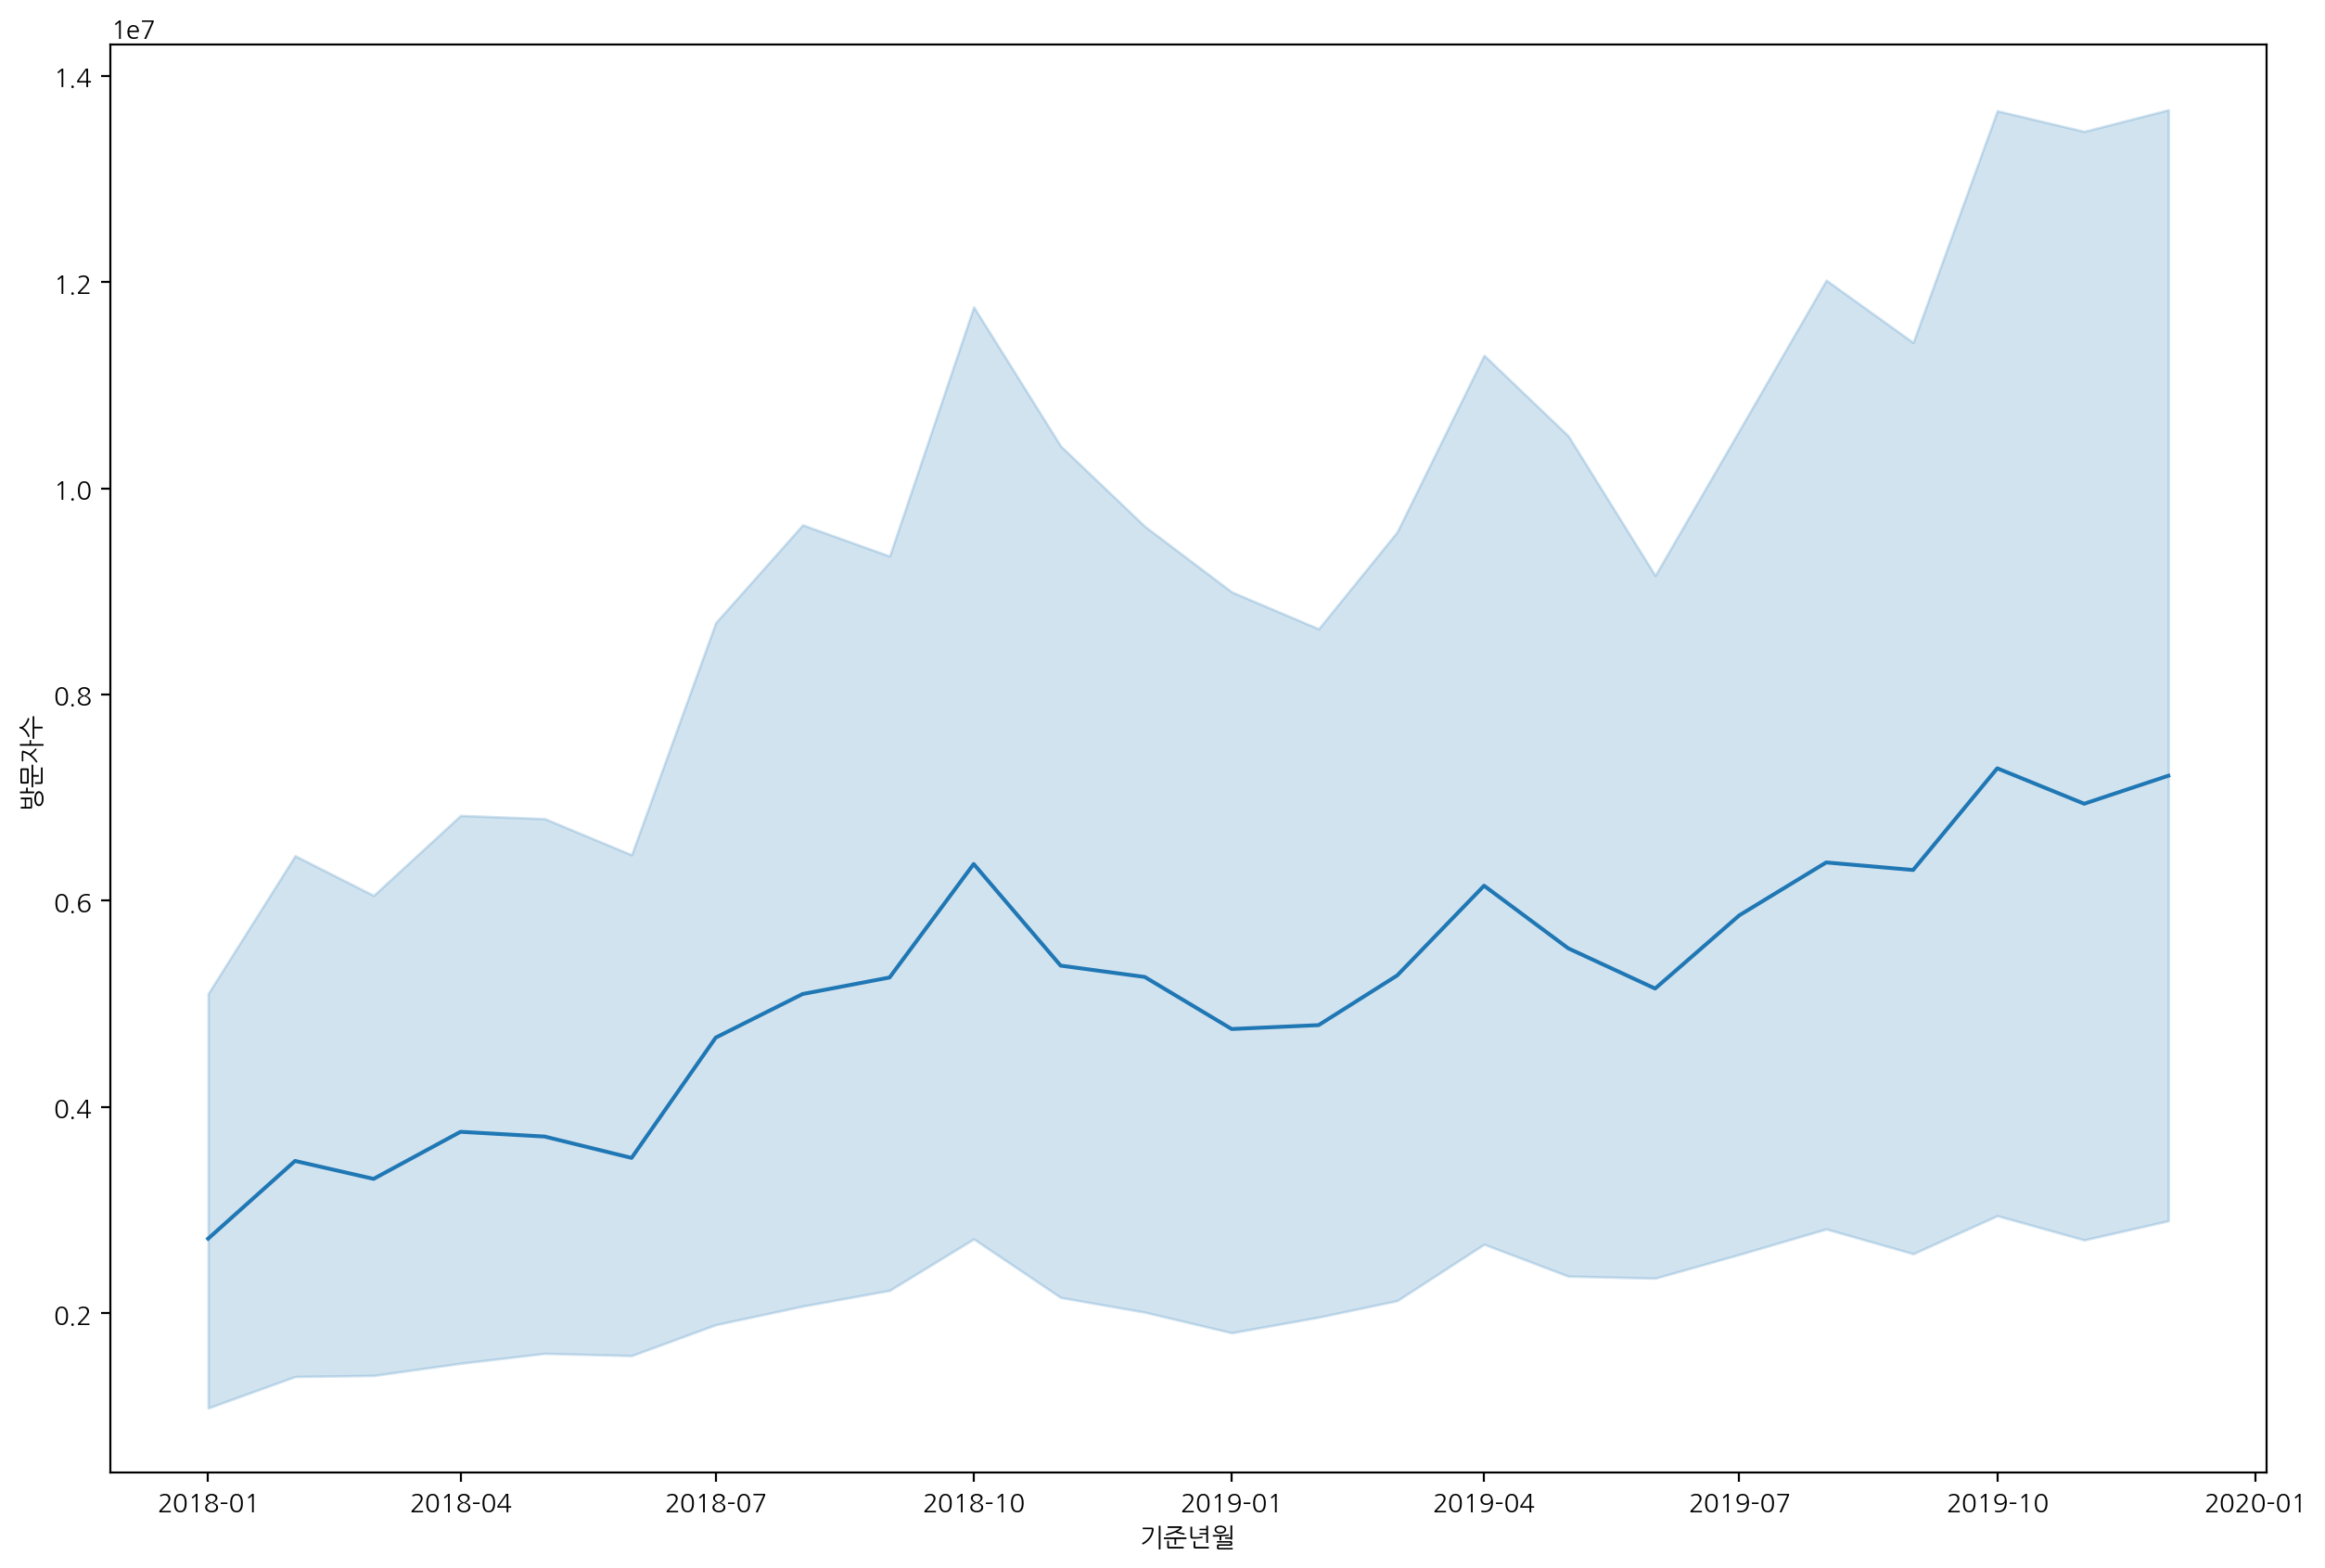

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df.sort_values("기준년월"), x="기준년월", y="방문자수", estimator="sum")

봄(4월)/여름(8월)/가을(10월)에 증가,

여름(6월)/겨울(11,1,2월)마다 살짝씩 감소하는 것을 볼 수 있음

<AxesSubplot:>

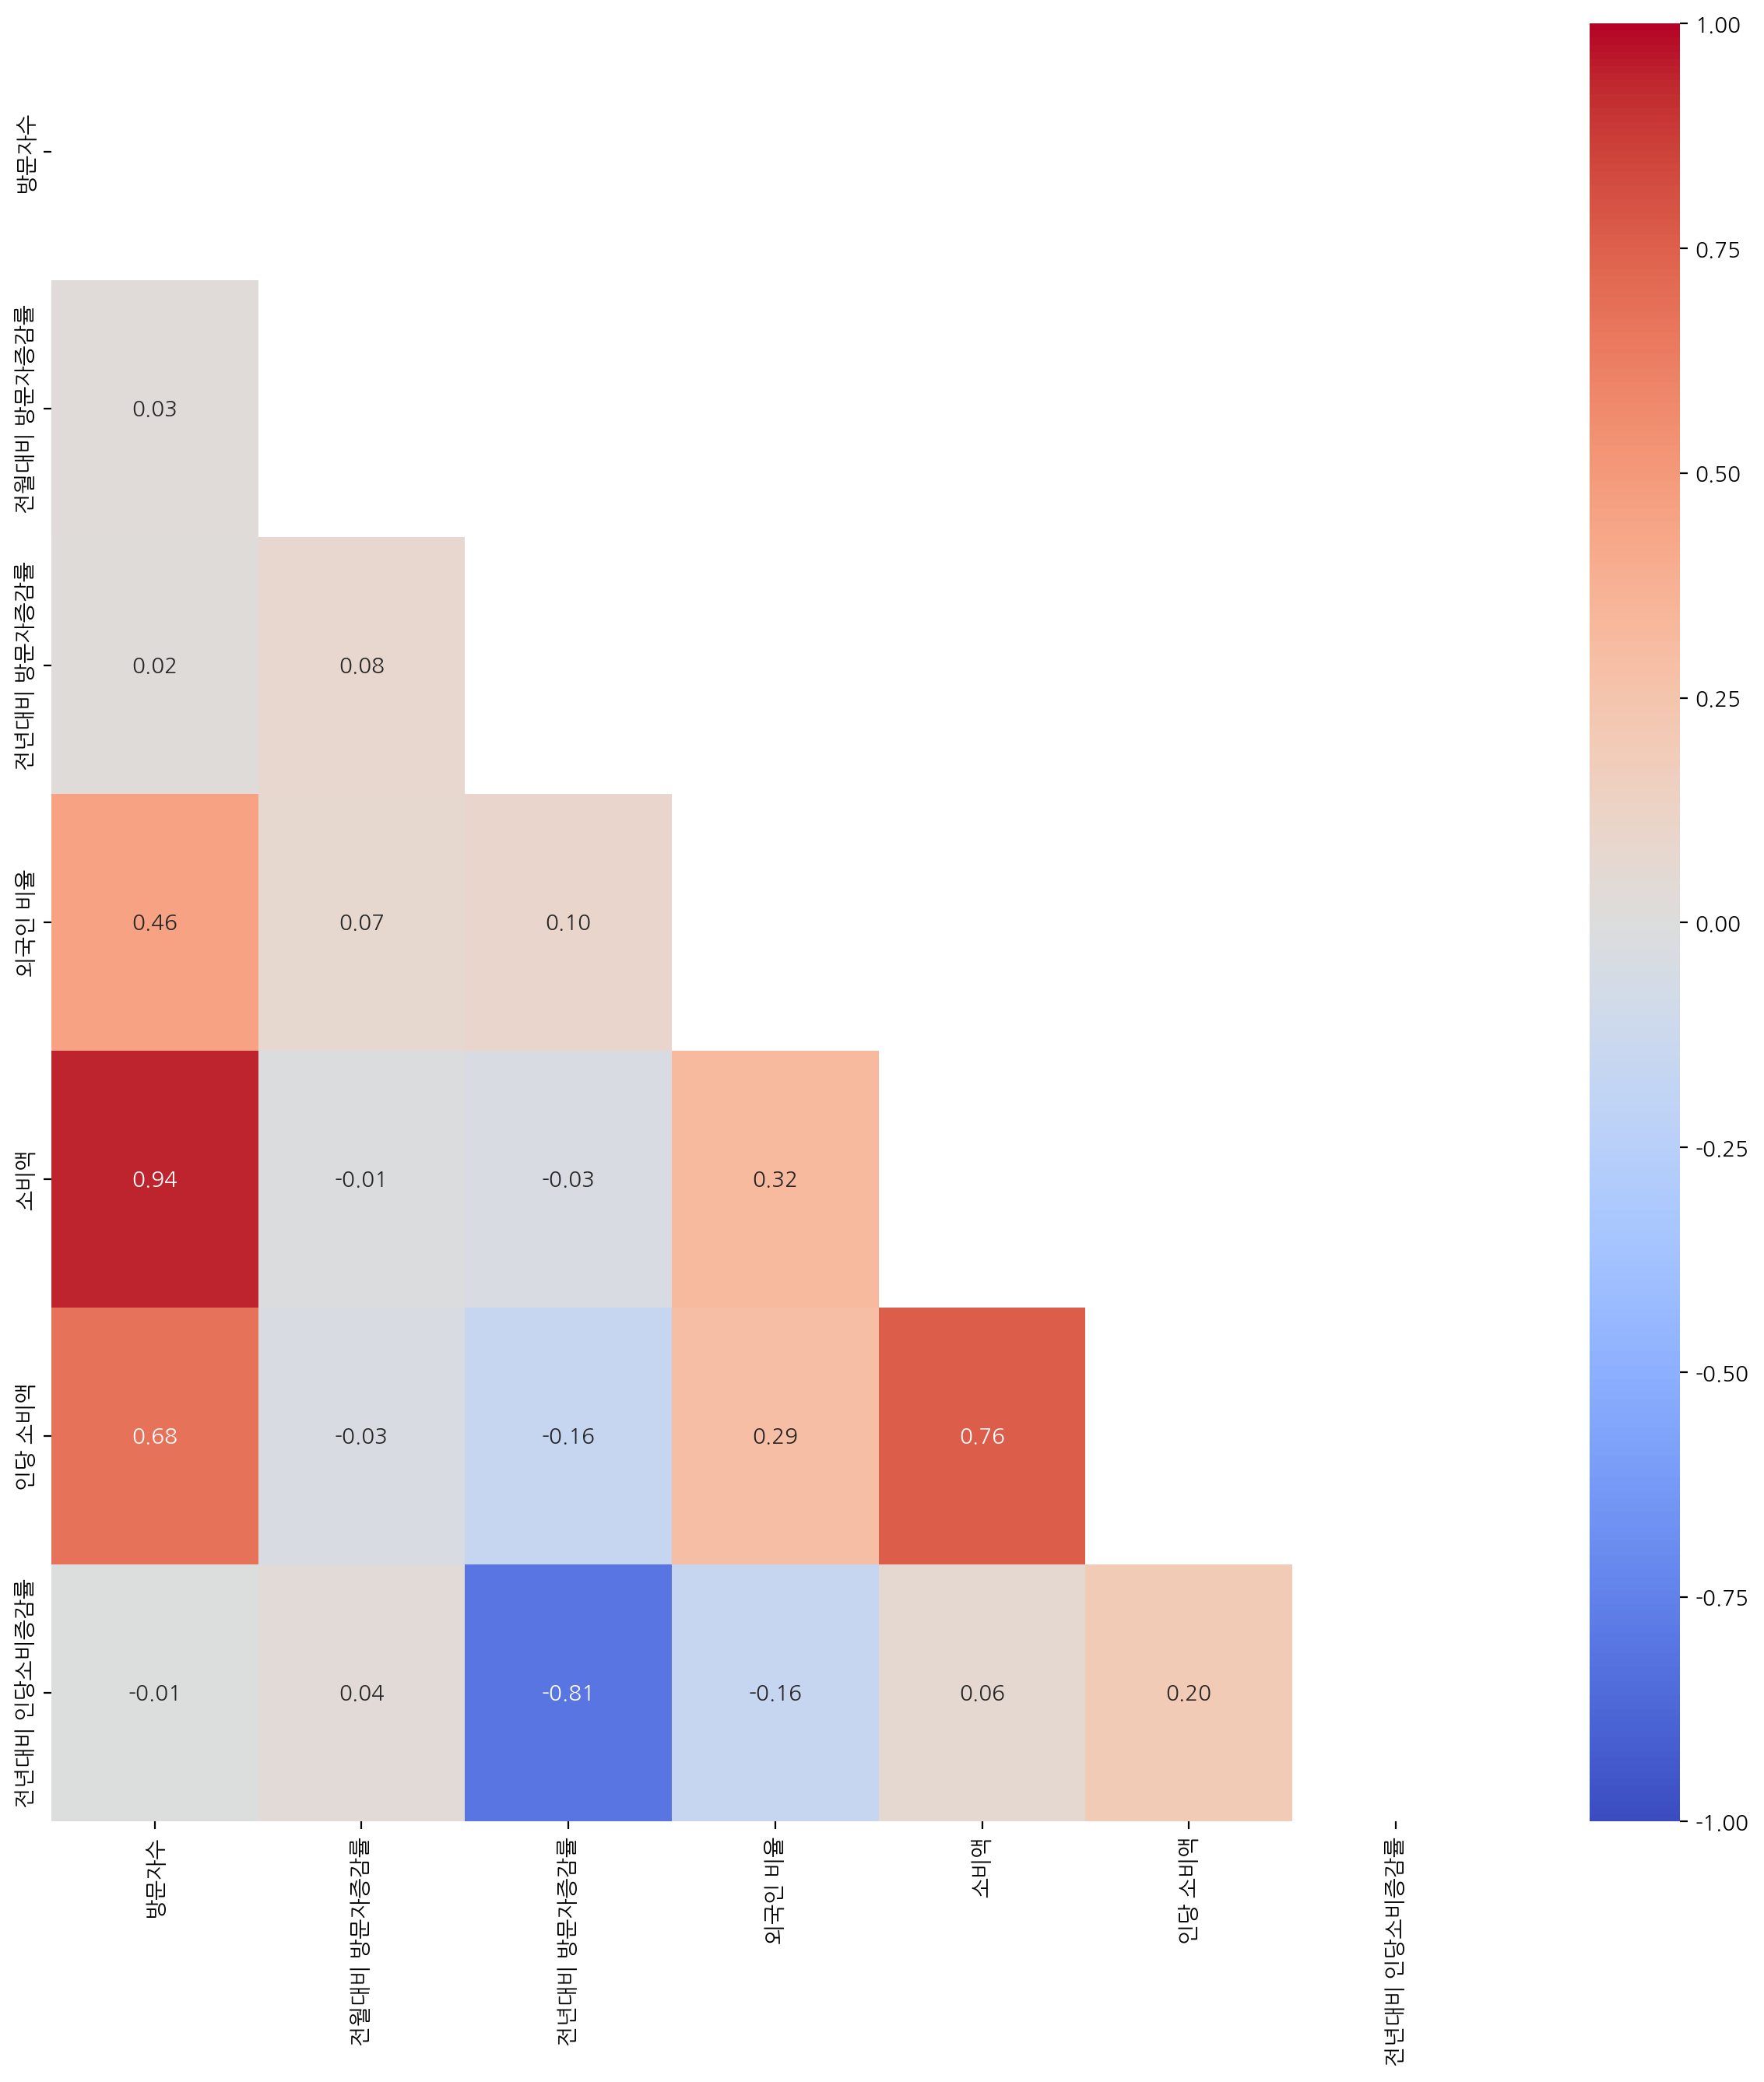

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=np.triu(np.ones_like(df.corr())))

상관분석을 통해 방문자 수가 많았던 곳에 소비액이 많았음을 알 수 있다.

<AxesSubplot:xlabel='광역지자체', ylabel='외국인 비율'>

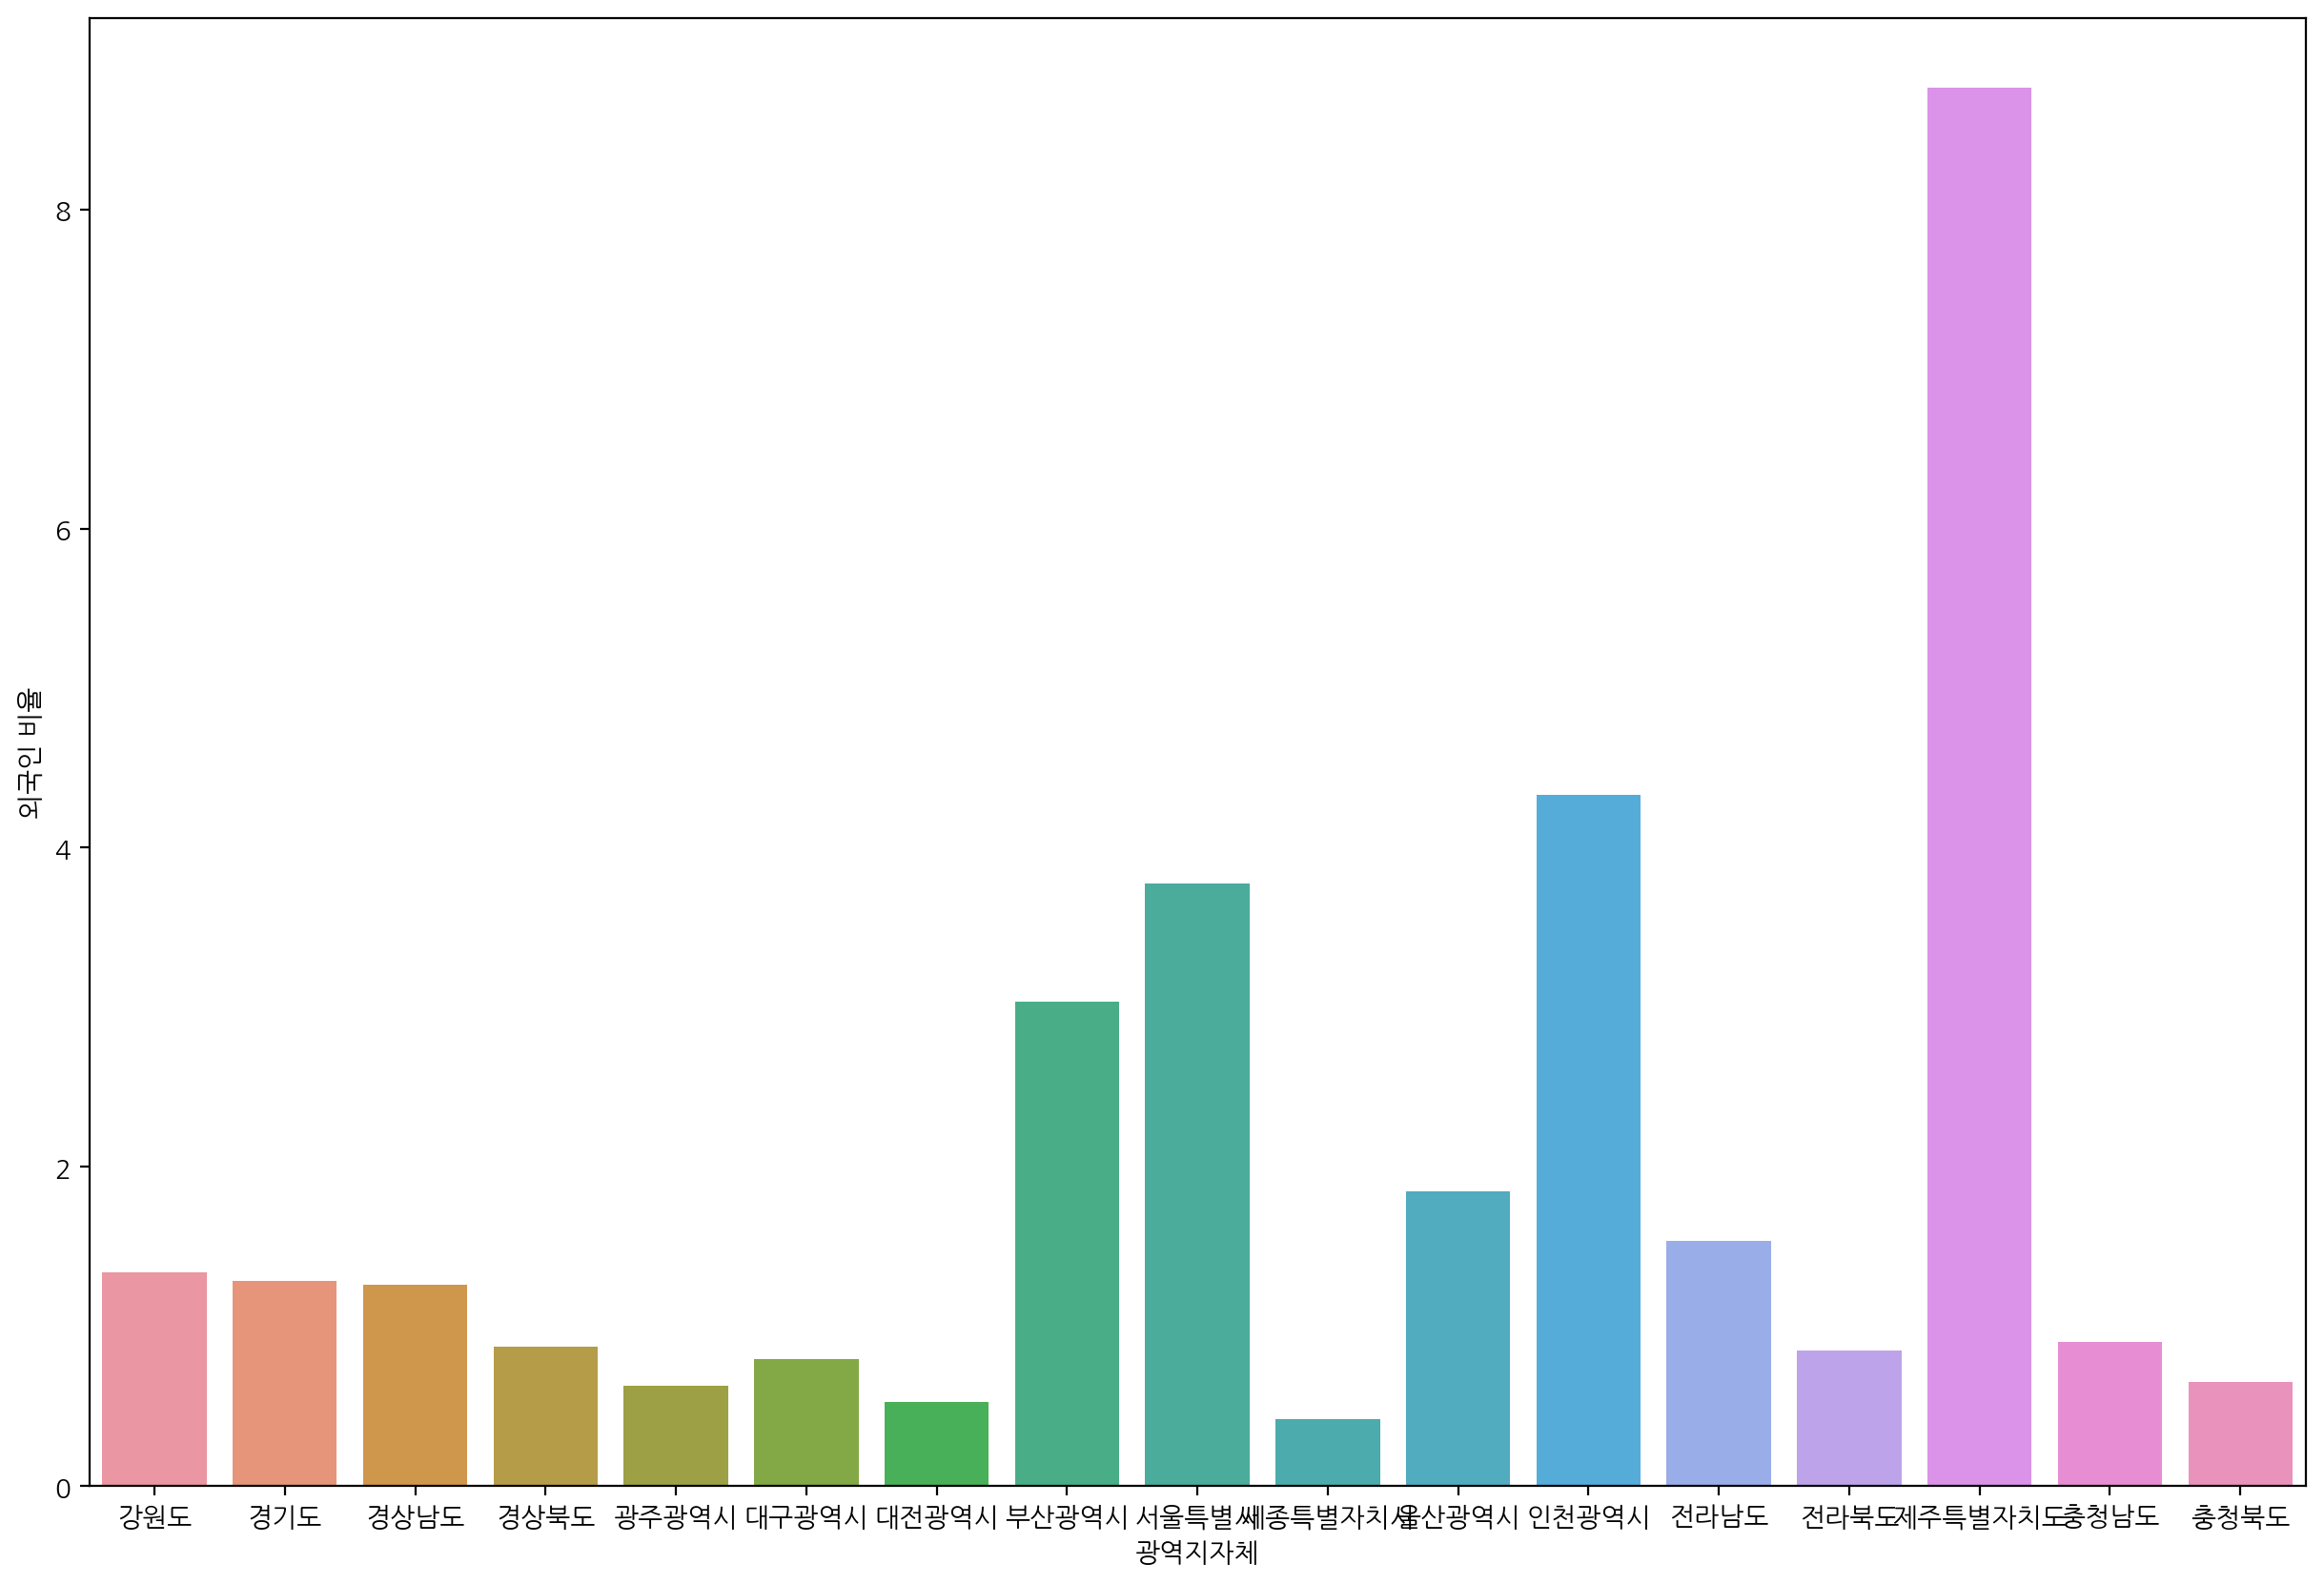

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x="광역지자체", y="외국인 비율", ci=None)

한국인 여행객과 외국인 여행객의 총합을 비교하여 외국인 비율이 높은 지자체를 확인해보았음.

식: 외국인 방문객 수 / (외국인 방문객 수 + 한국인 방문객 수)

제주도에 유난히 외국인 비율이 높음을 알 수 있음.

<AxesSubplot:xlabel='기준년월', ylabel='전년대비 방문자증감률'>

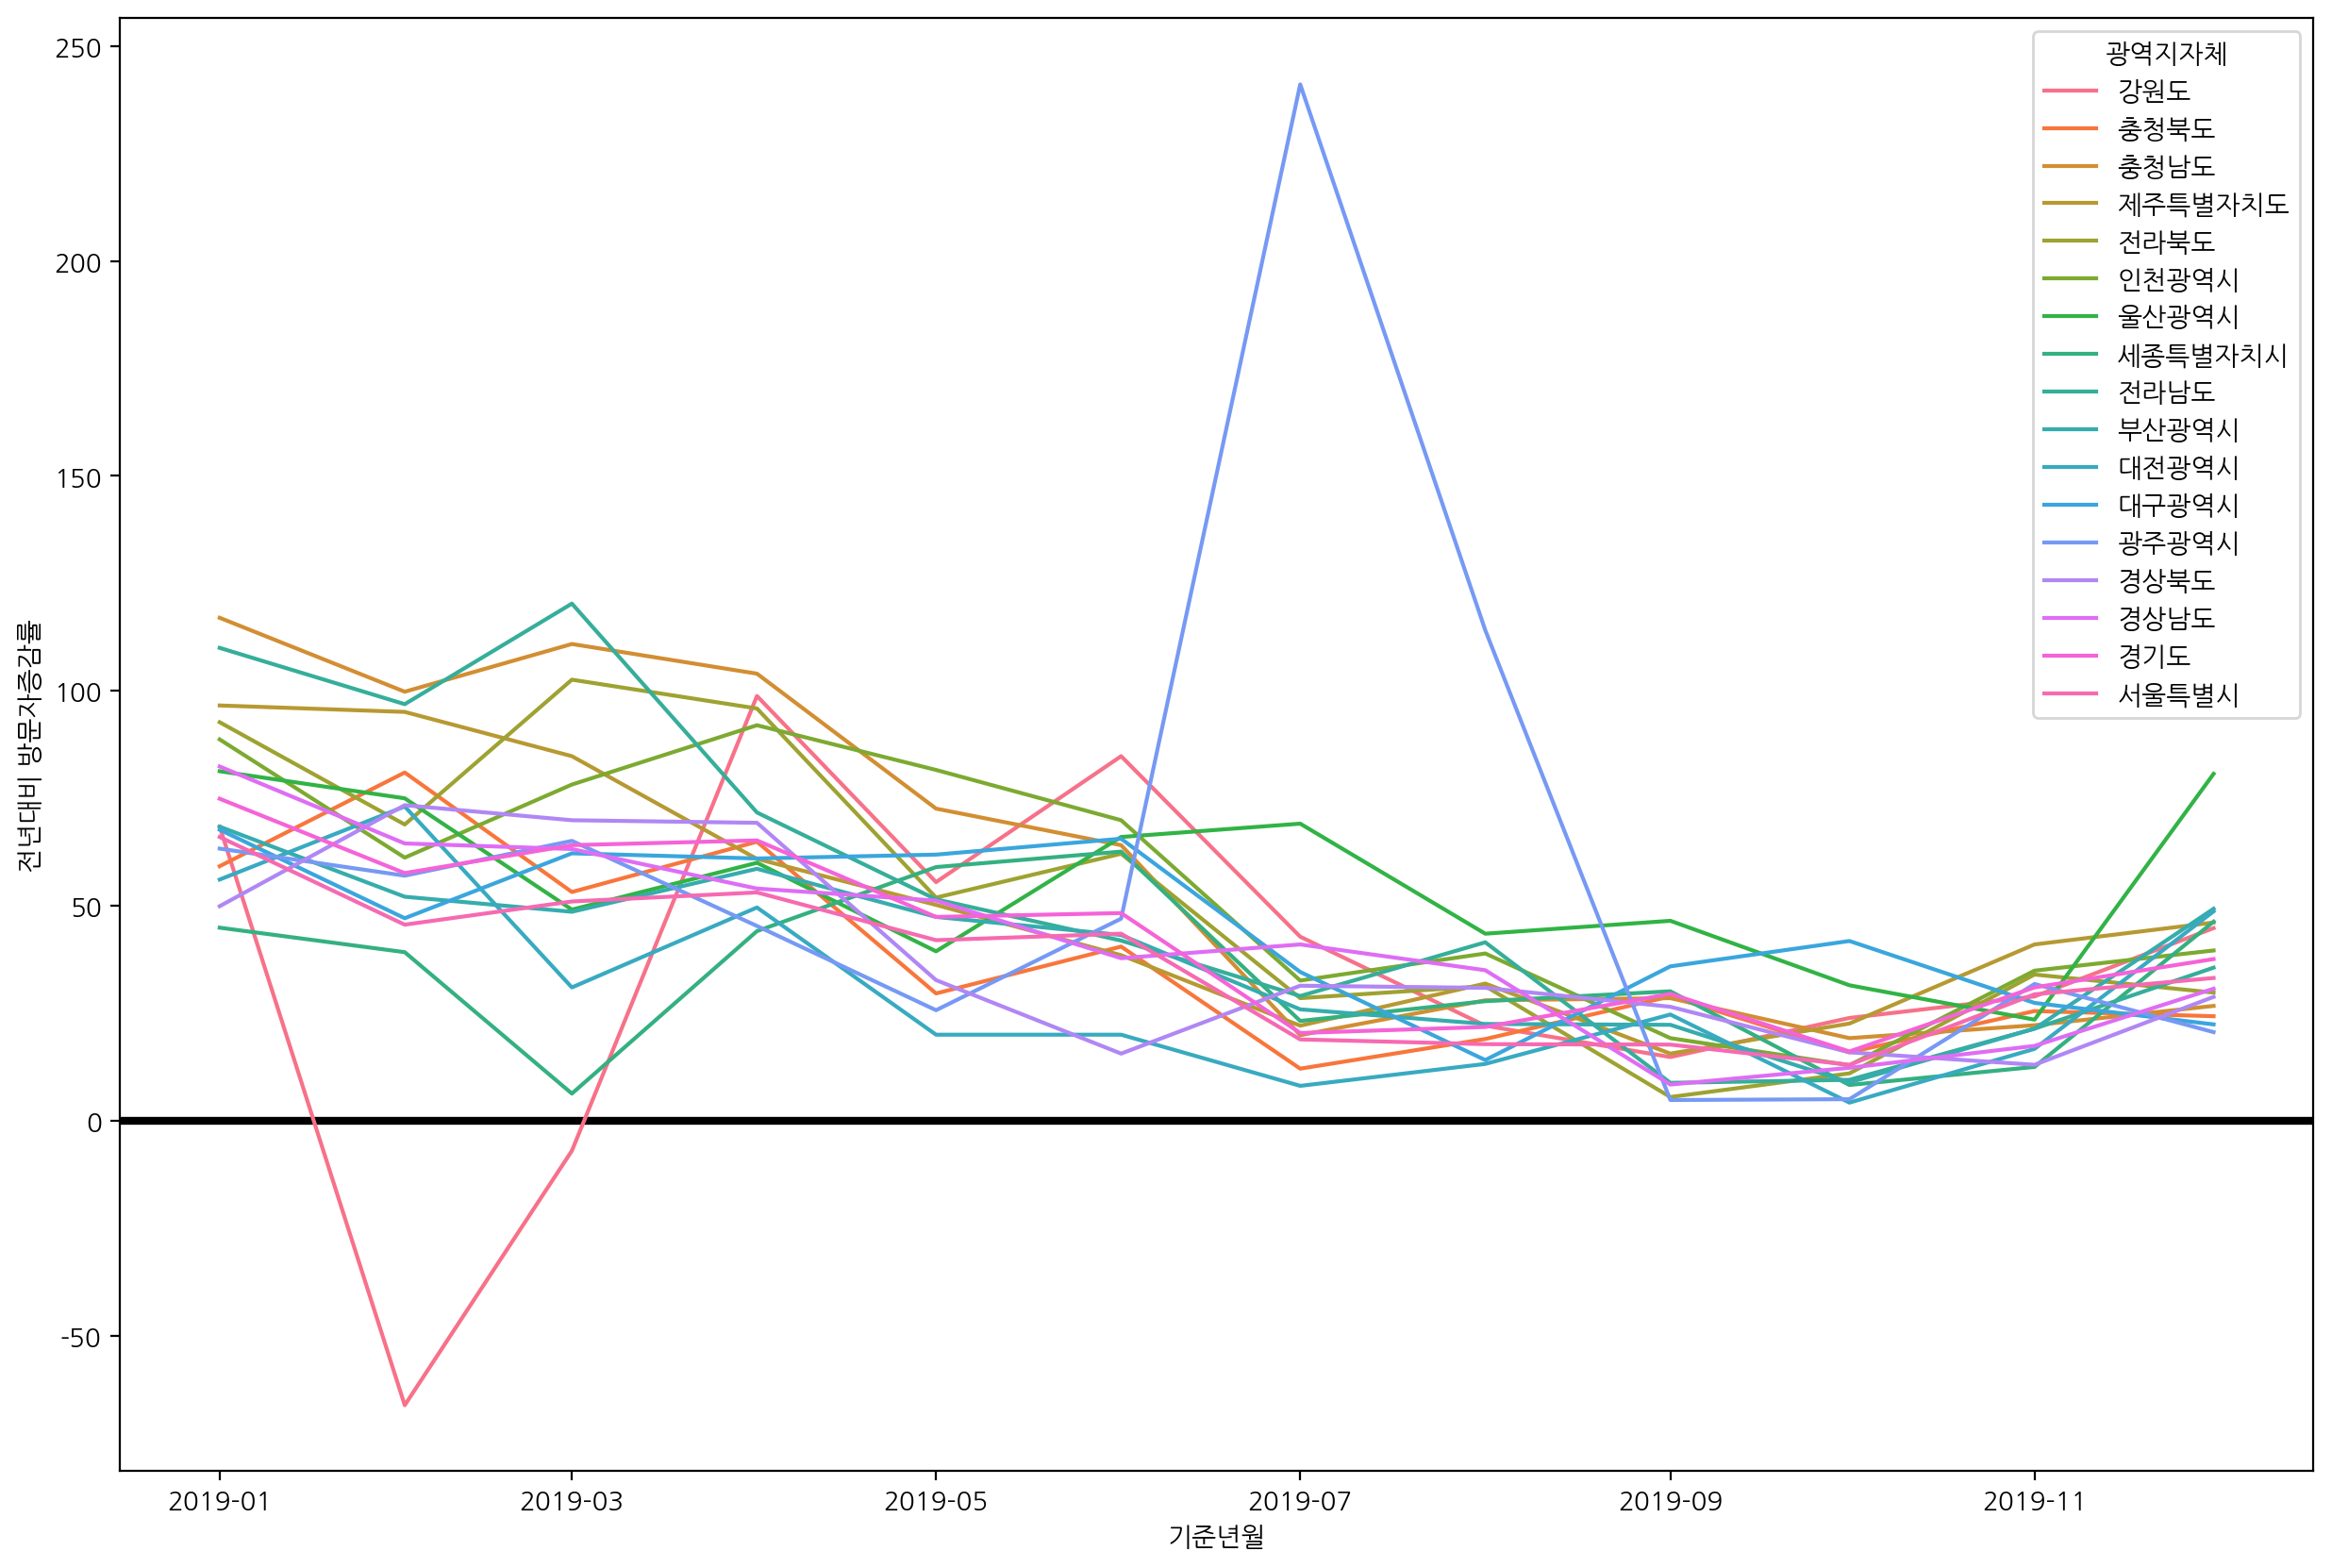

In [52]:
plt.figure(figsize=(15,10))
plt.axhline(y=0, color='black', linewidth=3)
sns.lineplot(data=df[df["기준년월"].dt.year == 2019].sort_values("기준년월"), x="기준년월", y="전년대비 방문자증감률", hue="광역지자체")

<AxesSubplot:xlabel='기준년월', ylabel='전월대비 방문자증감률'>

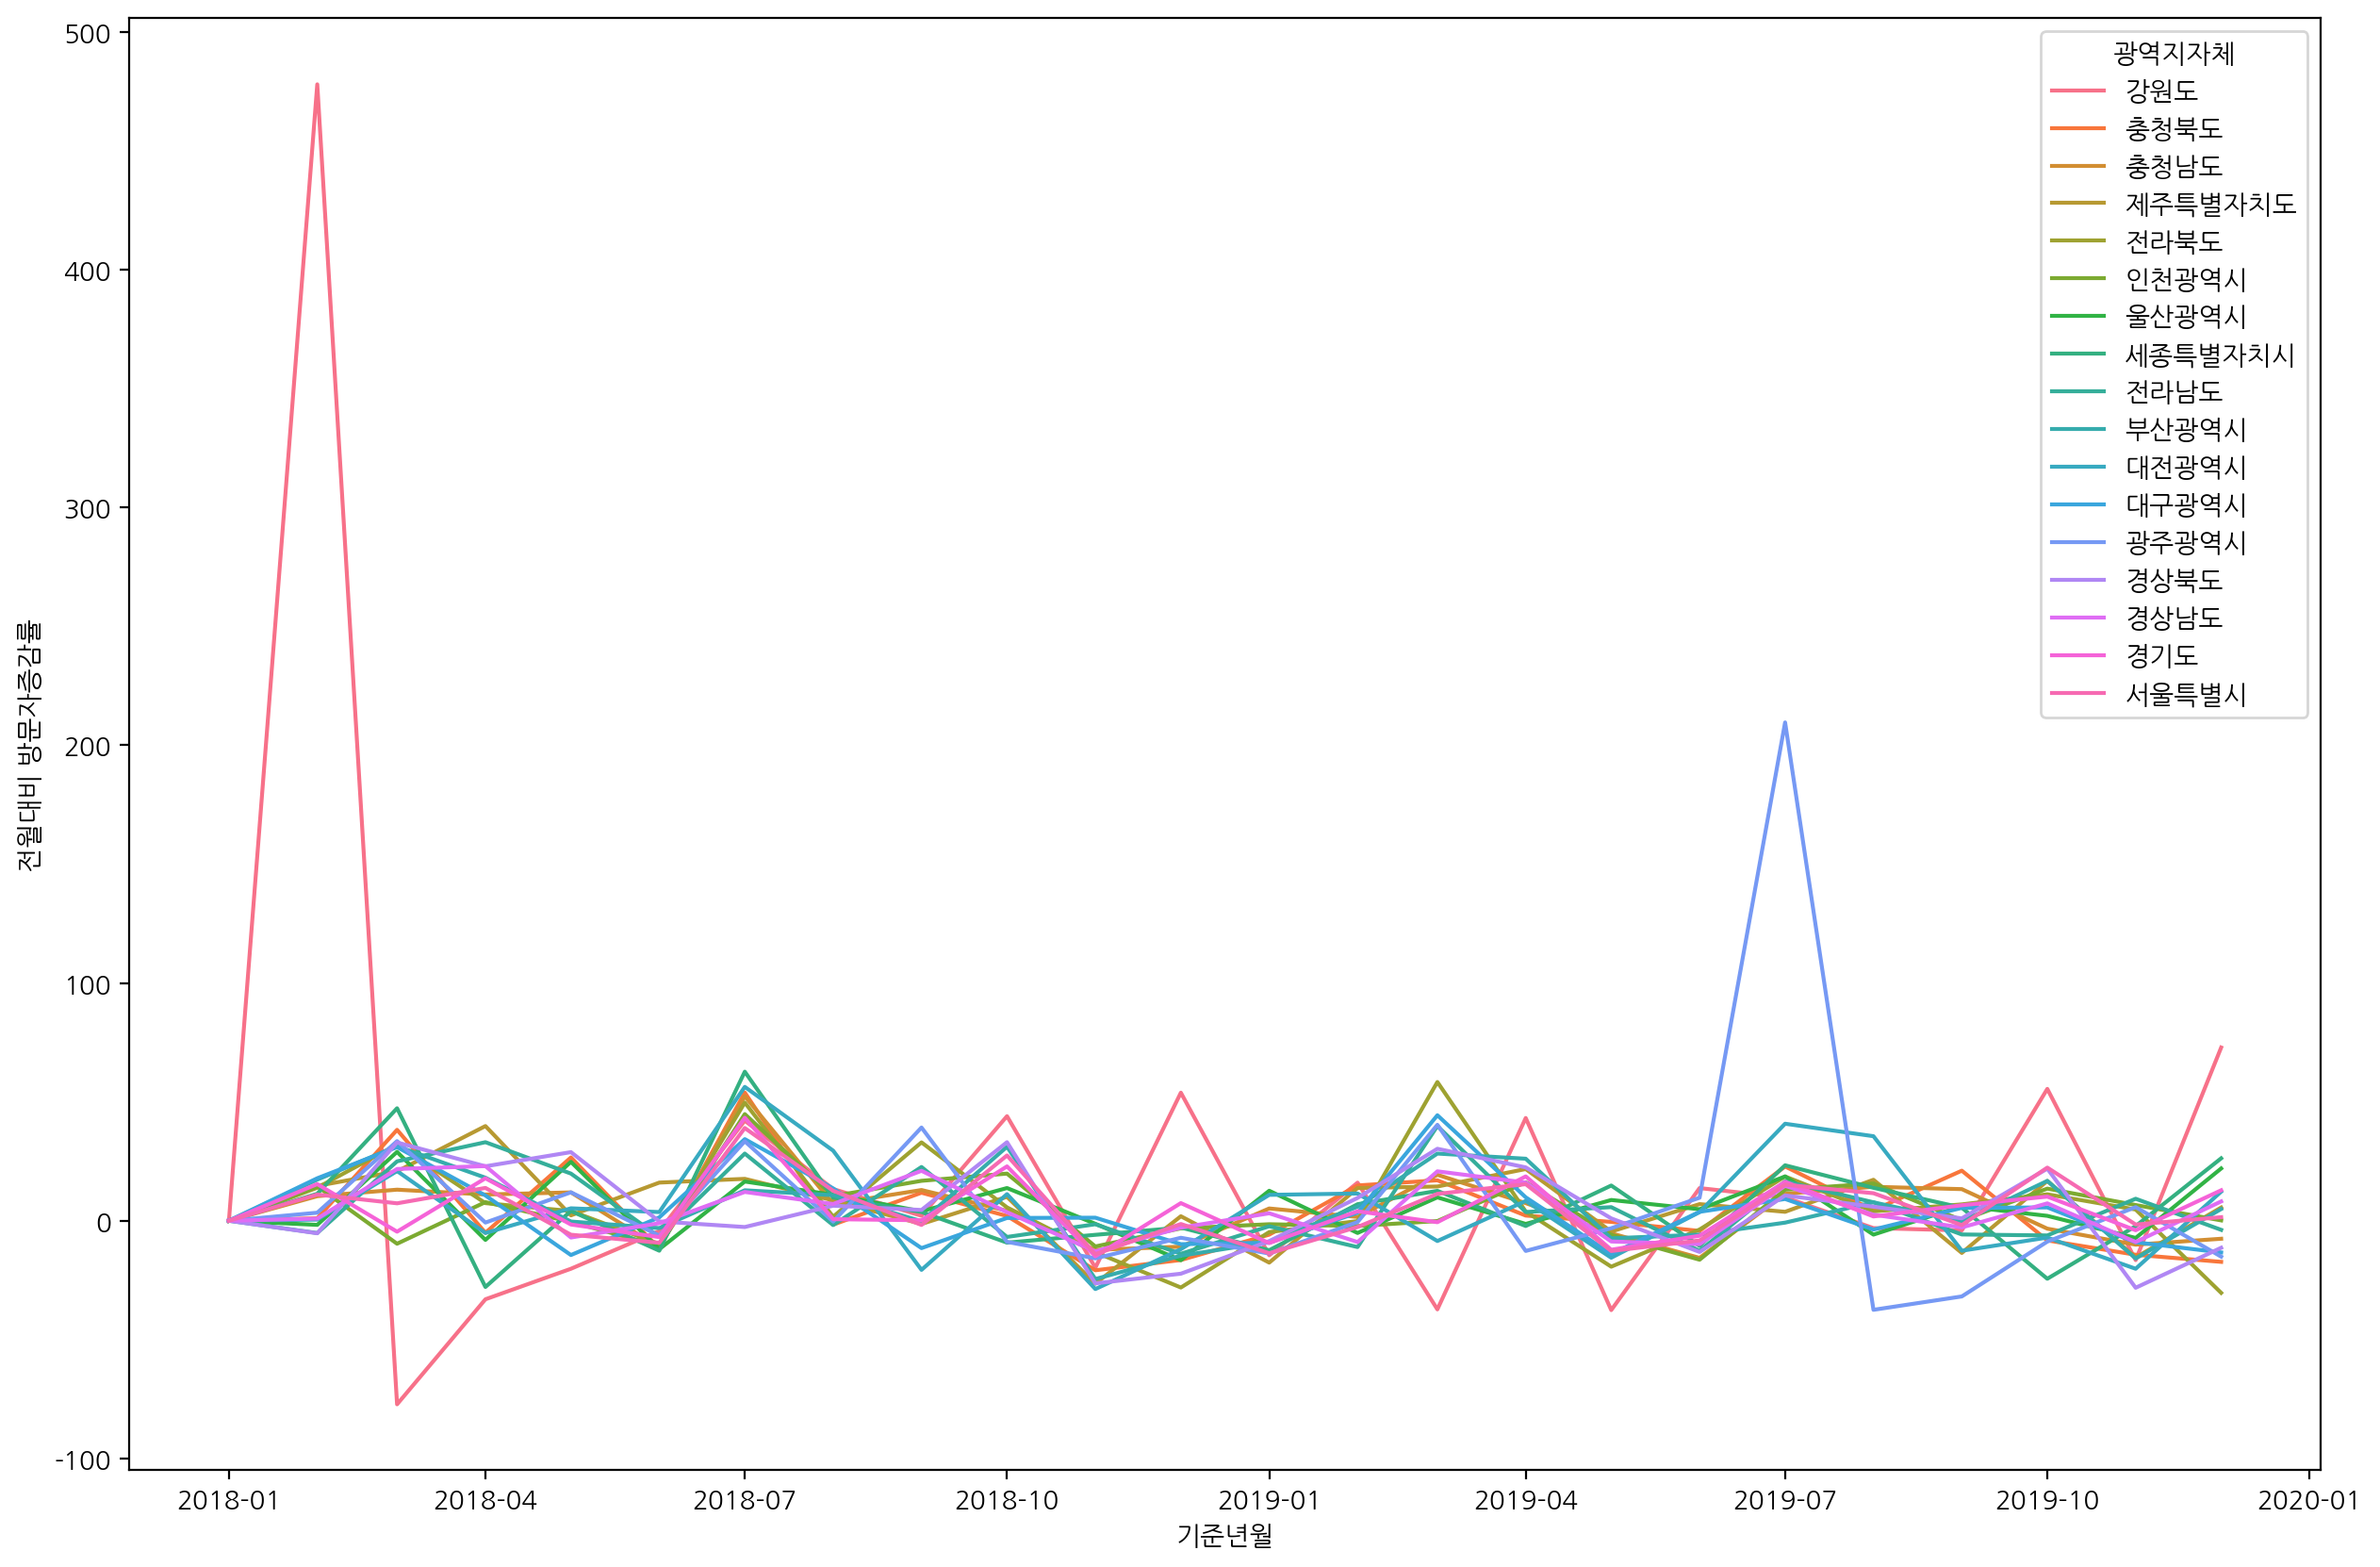

In [51]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df.sort_values("기준년월"), x="기준년월", y="전월대비 방문자증감률", hue="광역지자체")

데이터가 2018년부터 있어, 전년대비 증감률의 대한 데이터는 2019년 밖에 구하지 못했다.

전년대비 방문자증감률을 보면, 전년도에 동계올림픽이 있던 강원도를 제외하면 다 0 이상으로,

전년과 비교하여 모든 지자체의 방문자가 증가했음을 알 수 있다.

전월대비로는 지자체 별로 특별히 높낮이가 큰 곳은 보이지 않는다.

유난히 값이 높은 곳 두 곳에 대한 설명

2018-02에 평창 동계올림픽이 시작되어서 강원도에 외국인 방문자수가 급증하였다.

2019-07에 광주세계수영선수권을 개최하여 광주광역시에 외국인 방문자수가 급증하였다.

<AxesSubplot:xlabel='기준년월', ylabel='전년대비 인당소비증감률'>

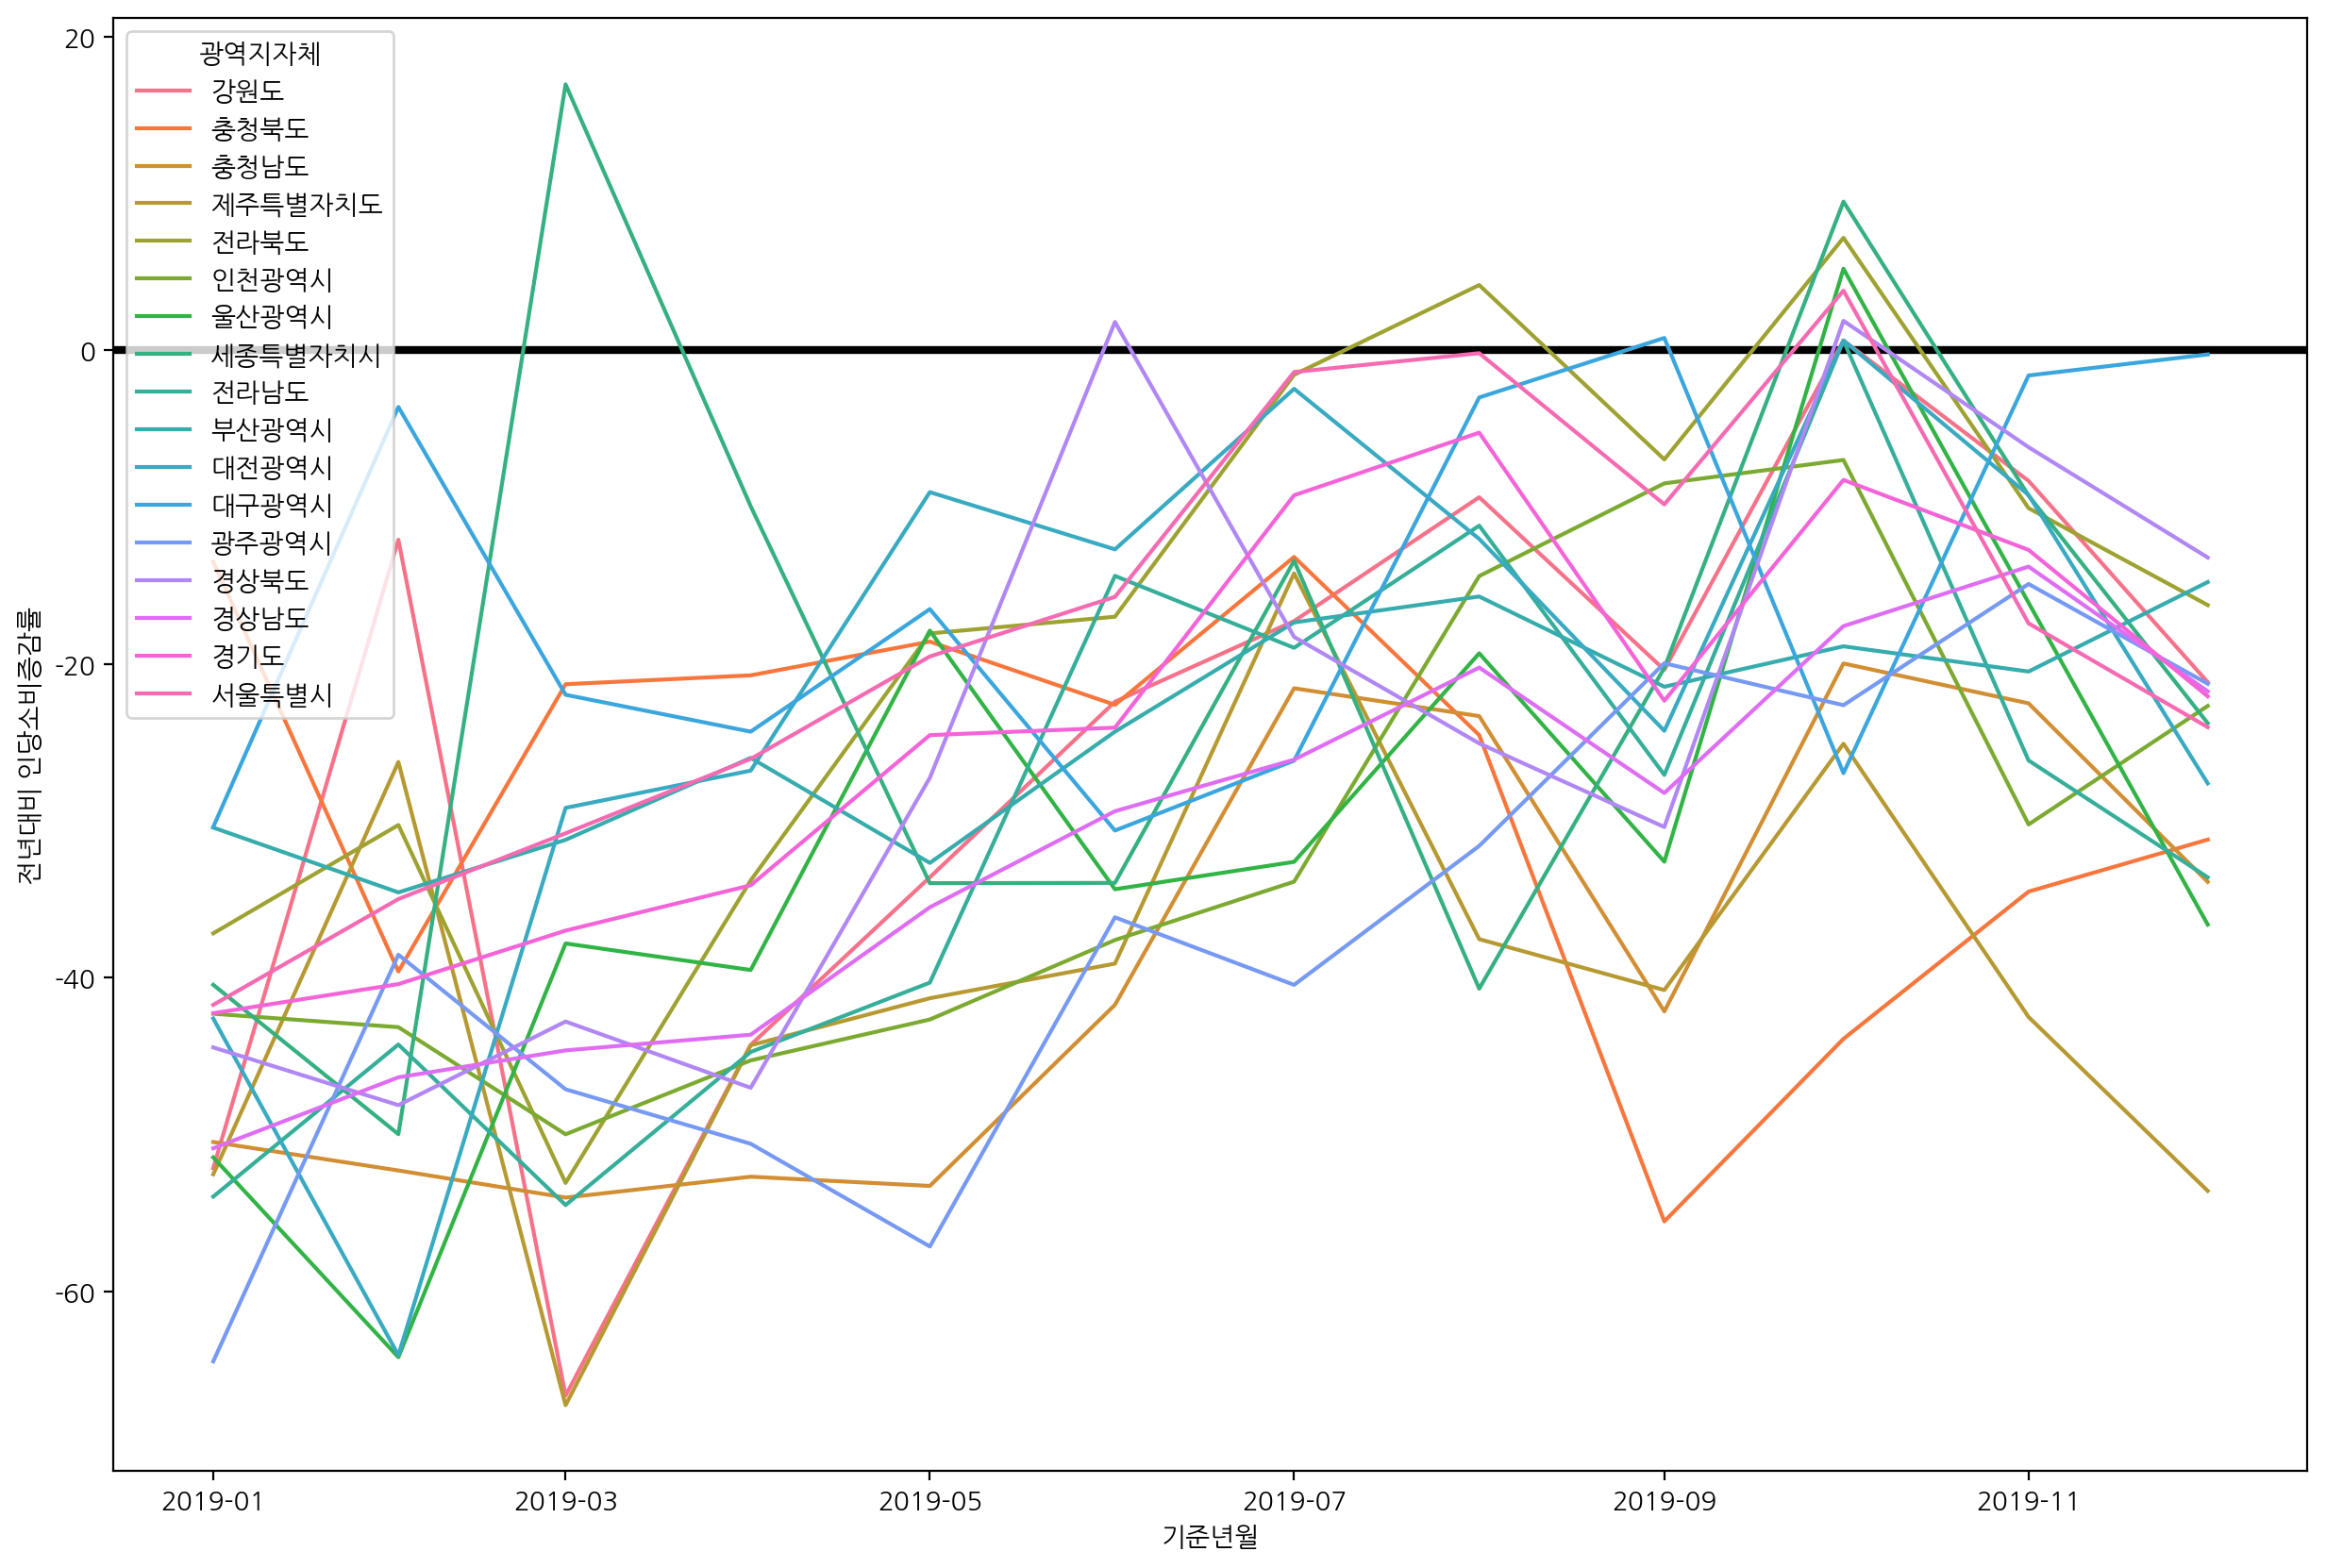

In [50]:
plt.figure(figsize=(15,10))
plt.axhline(y=0, color='black', linewidth=3)
sns.lineplot(data=df[df["기준년월"].dt.year == 2019].sort_values("기준년월"), x="기준년월", y="전년대비 인당소비증감률", hue="광역지자체")

데이터가 2018년부터 있어, 전년대비 증감률의 대한 데이터는 2019년 밖에 구하지 못했다.

전년대비 인당소비증감률을 보면, 대부분이 0이하로 

이전 그래프와 비교하여 전년에는 모든 지자체의 방문자가 증가했지만, 인당 소비률은 감소했음을 알 수 있다.

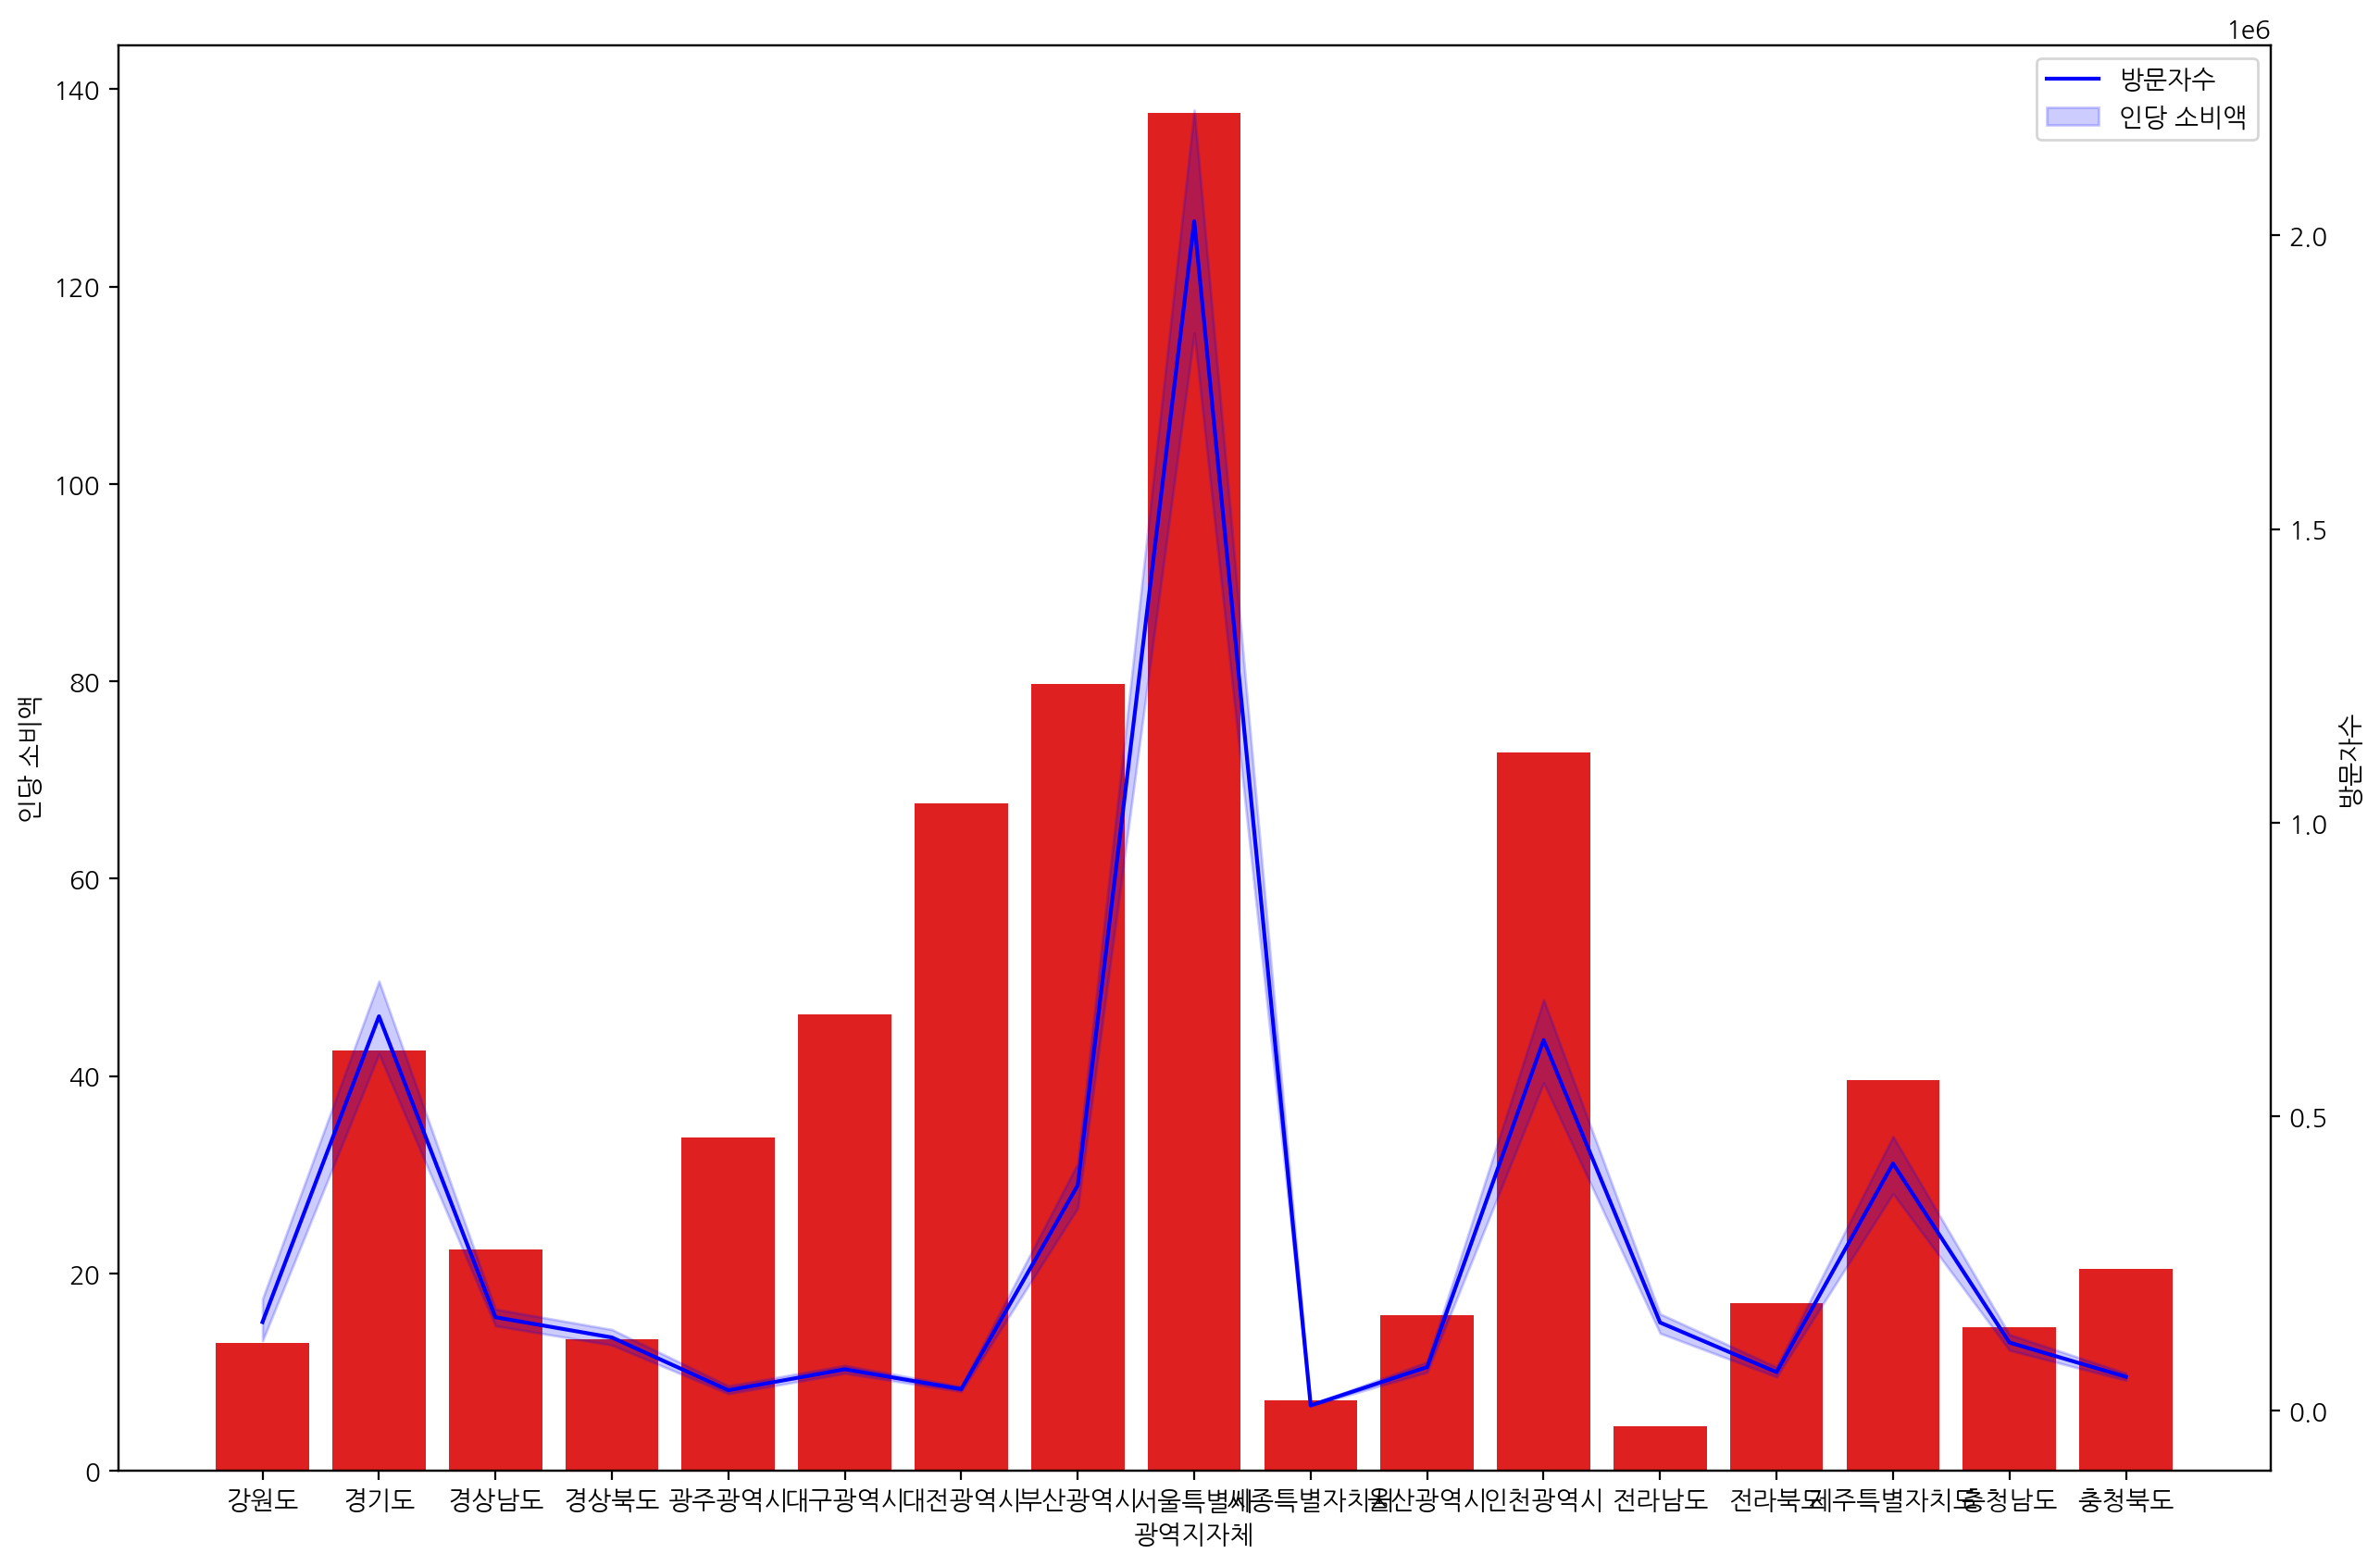

In [62]:
fig, axe1 = plt.subplots(figsize=(15, 10))
axe2 = axe1.twinx()

sns.barplot(ax = axe1, data=df, x="광역지자체", y="인당 소비액", ci=None, color='red')
sns.lineplot(ax = axe2, data=df, x="광역지자체", y="방문자수", color='blue')

axe2.legend(["방문자수", "인당 소비액"])

방문자 수에 비해 인당 소비액이 높은 곳들을 공략하면 많은 관광 수익을 얻을 수 있을 거라고 생각됨